In [1]:
import pandas as pd

In [10]:
#Loading dataset
data = pd.read_csv('Data/AmesHousing.csv')

In [11]:
#Displaying the first few rows
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [12]:
#checking for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values>0])

Lot Frontage       490
Alley             2732
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


In [13]:
#Drop columns with too many missing values or fill them appropriately
data = data.drop(['Alley','Pool QC','Fence','Misc Feature'], axis=1)
data = data.fillna(data.median())

C:\Users\Deepthi\AppData\Local\Temp\ipykernel_21996\2754967114.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.median())


In [14]:
#Converting categorical columns to numeric using one-hot encoding
data = pd.get_dummies(data)

In [15]:
data.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,0,0,0,1,0,0,0,0,1,0
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,0,0,0,1,0,0,0,0,1,0
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,0,0,0,1,0,0,0,0,1,0
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0,0,0,1,0,0,0,0,1,0
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,0,0,0,1,0,0,0,0,1,0


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

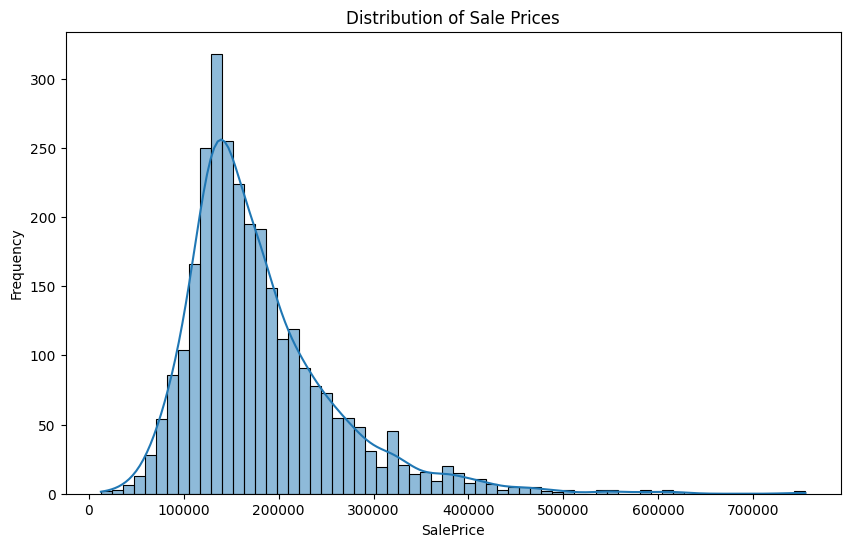

In [19]:
#Plotting the distribution of SalePrice
plt.figure(figsize=(10,6))
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

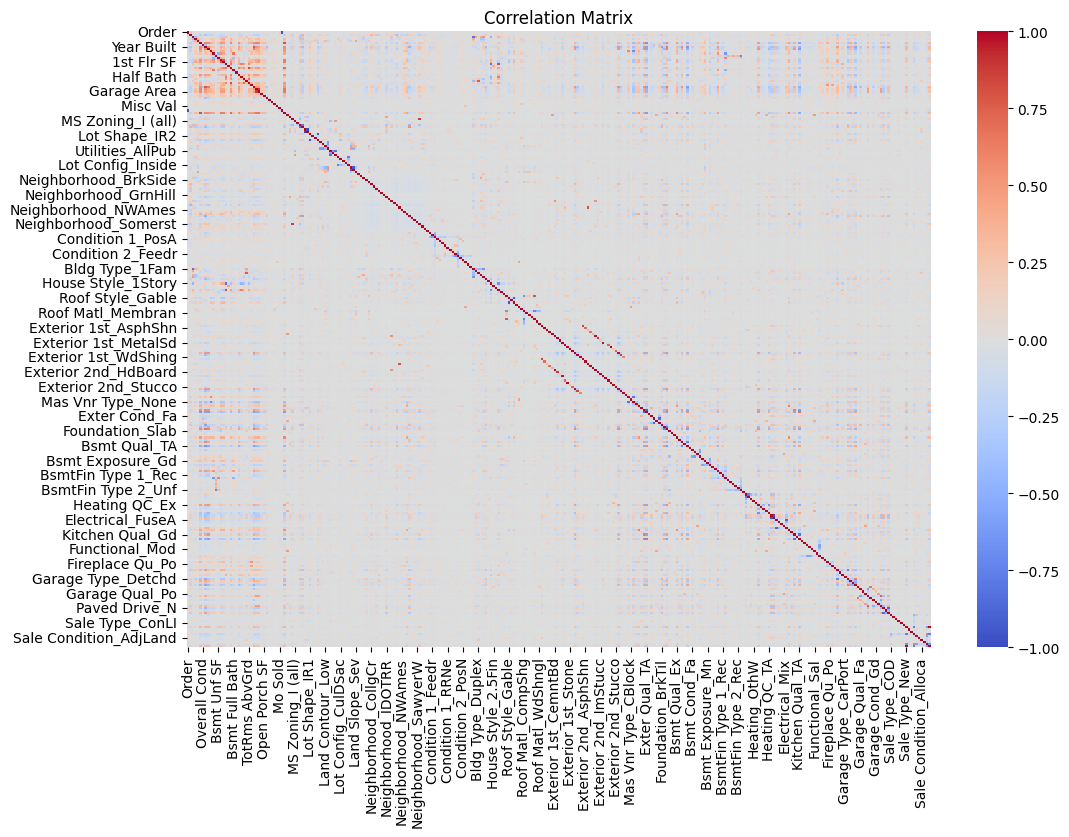

In [20]:
#Correlation matrix
corr_matrix=data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [21]:
#Selecting features with high correlation to SalePrice
features = corr_matrix.index[abs(corr_matrix['SalePrice'])>0.5].tolist()
features.remove('SalePrice')

In [22]:
print(features)

['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Exter Qual_TA', 'Foundation_PConc', 'Bsmt Qual_Ex', 'Kitchen Qual_Ex', 'Kitchen Qual_TA']


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [24]:
X=data[features]
y=data['SalePrice']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [26]:
#Training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [27]:
#Predicting and evaluating the model
y_pred=model.predict(X_test)
rmse=mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 30962.35369114262


In [28]:
import joblib

In [29]:
#Saving the trained model
joblib.dump(model, 'Results/random_forest_model.pkl')

['Results/random_forest_model.pkl']

In [31]:
#Saving the feature importances
feature_importances=pd.DataFrame({'feature':features,'importance':model.feature_importances_})
feature_importances.to_csv('Results/feature_importance.csv', index=False)